<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>


<h1 align=center><font size = 5>LINEAR REGRESSION</font></h1>

The work of a data scientist goes way beyond performing basic tasks such as analyzing and visualizing data. Now, we will explore another exciting tool of data analysis: <strong>predictions and estimates</strong>. This lesson covers the use of a linear model to create predictions using our data.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 4><strong>The following topics are covered: </strong></font>
<br>
- <p><a href="#1">Getting to Know the Data</a></p>
- <p><a href="#2">Visualizing the Data</a></p>
- <p><a href="#3">Building a Linear Model</a></p>
- <p><a href="#4">Using the Model for Estimations/Predictions</a></p>
<p></p>

</div>
<hr>


<a id="1"></a>
# Getting to Know the Data

Before we start working on a linear model, let's see what the data used in this notebook is about.

<div class="alert alert-success alert-success" style="margin-top: 20px">
<font size = 3><strong>Sanitation vs Life Expectancy</strong></font>
<br>
<br>
This data corresponds to **the percentage of the population with access to improved sanitation facilities** and **life expectancy (in years)** in 2014 for 183 countries in the world. It was extracted from [The World Bank](http://data.worldbank.org/) website and pre-processed to eliminate NAs and other issues.

<br><br>
Here, we examine two variables: Access to Sanitation and Life Expectancy.

<br><br>
Access_to_Sanitation: Access to improved sanitation facilities refers to the percentage of the population using improved sanitation facilities. Improved sanitation facilities are likely to ensure hygienic separation of human excreta from human contact. They include flush/pour flush (to piped sewer system, septic tank, pit latrine), ventilated improved pit (VIP) latrine, pit latrine with slab, and composting toilet.

<br><br>
Life_Expectancy: Life expectancy at birth indicates the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

</div>

### Importing the Dataset

Run the code cell below to load the data into the dataframe **`my_data`**.

In [1]:
my_data <- read.csv("https://ibm.box.com/shared/static/q0gt7rsj6z5p3fld163n70i65id3awz3.csv")

### Explore the Data

Let's run the cells below just to see what the dataframe looks like and check its structure.

In [2]:
head(my_data)

Country,Access_to_Sanitation,Life_Expectancy
Afghanistan,31.8,60.37446
Albania,93.2,77.83046
Algeria,87.4,74.80810
Angola,51.1,52.26688
Argentina,96.1,76.15861
Armenia,89.5,74.67571


In [3]:
str(my_data)

'data.frame':	183 obs. of  3 variables:
 $ Country             : Factor w/ 183 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Access_to_Sanitation: num  31.8 93.2 87.4 51.1 96.1 89.5 97.7 100 100 87.9 ...
 $ Life_Expectancy     : num  60.4 77.8 74.8 52.3 76.2 ...


Just like we mentioned before, it looks like the dataframe contains 183 observations of 3 variables: **Country Name**, **Access to Sanitation Facilities** (in % of population) and **Life Expectancy** (in years).

<a id="2"></a>
# Visualizing the Data

Now it's time to visualize our dataset. Do you think we'll be able to identify any trends?

To begin, let's make a simple scatter plot of Access to Sanitation Facilities and Life Expectancy.

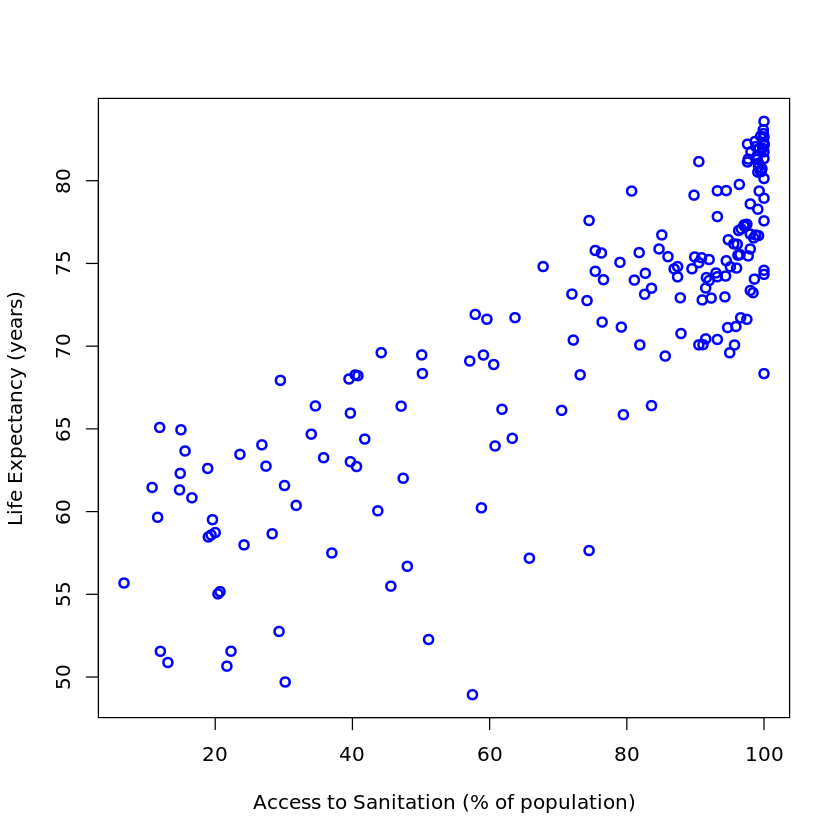

In [4]:
plot(my_data$Access_to_Sanitation, my_data$Life_Expectancy, xlab = "Access to Sanitation (% of population)",
     ylab = "Life Expectancy (years)", col = "blue", lwd = 2)

What if we compare the values of each country for these two variables?

Here, we'll just make a simple bar plot to see what are the **bottom 20 countries** for Sanitation and Life Expectancy, respectively. 

You can use the function order() to sort the data. 

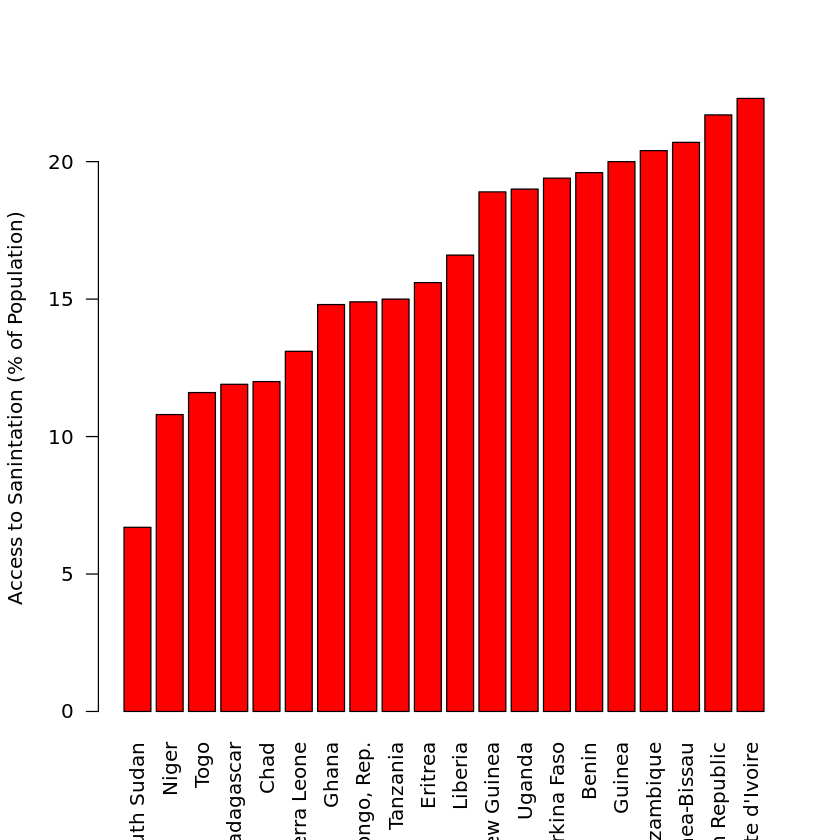

In [5]:
# Order rows increasingly by Sanitation
my_data <- my_data[order(my_data["Access_to_Sanitation"]),]

barplot(my_data[c(1:20),"Access_to_Sanitation"],
        names.arg = as.vector(my_data[c(1:20),"Country"]),
        col = "red", las = 2,
       ylab = "Access to Sanintation (% of Population)")

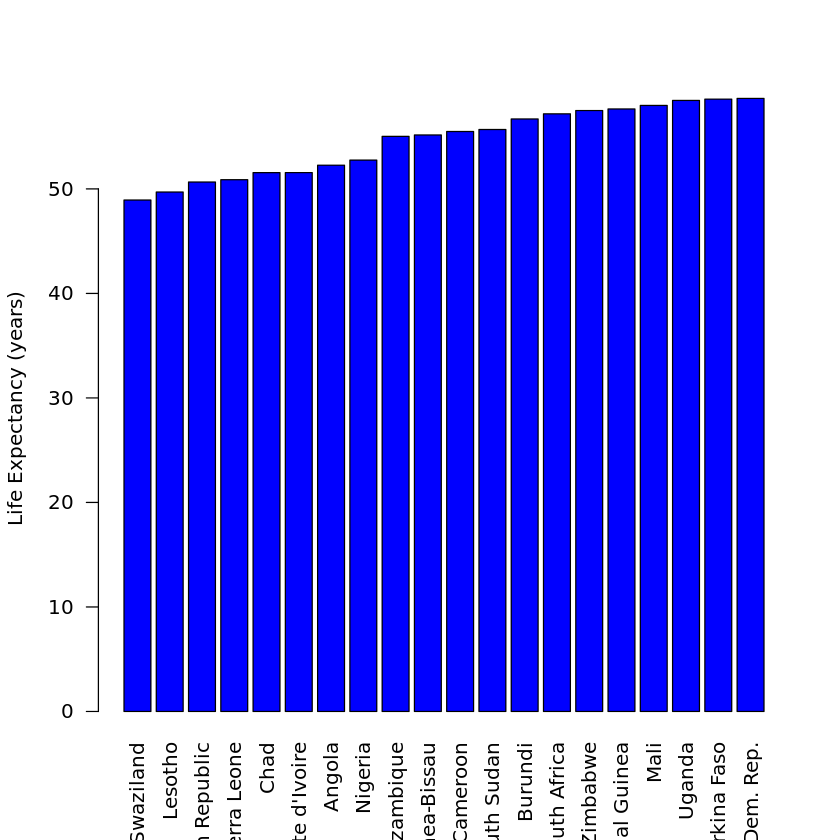

In [6]:
# Order rows increasingly by Life Expectancy
my_data <- my_data[order(my_data["Life_Expectancy"]),]

barplot(my_data[c(1:20),"Life_Expectancy"],
        names.arg = as.vector(my_data[c(1:20),"Country"]),
        col = "blue", las = 2,
       ylab = "Life Expectancy (years)")

-------

<a id="3"></a>
# Building a Linear Model

Looking at the plots, were you able to identify any trends? Is there a relationship between Access to Sanitation and Life Expectancy? If so, which is the independent (explanatory) variable and which is the dependent (outcome) variable?

Since access to sanitation is likely to affect one's life expectancy, in our linear model, Access to Sanitation is our independent variable and Life Expectancy is our dependent variable. 

Let's learn how we can run a linear regression model in R!

<div class="alert alert-success alert-success" style="margin-top: 20px">
<font size = 3><strong>To run linear regression in R we use the function <i>lm()</i>:</strong></font><br>
<br>
The first argument of <strong>lm()</strong> has the form <i>"response <strong>~</strong> term"</i>. This is what we call <strong>formula</strong>. <br>
<br>
The first element of the formula is the <i><strong>response (dependent variable)</strong></i>, and it should have numeric values (continuous variable). As we want to use this model to measure the relationship between Access to Sanitation and Life Expectancy, we should use the dependent variable <i>Life_Expectancy</i> column as <i>response</i>. <br>
<br>
The second element, after the "~", is called <i><strong>term (independent variable)</strong></i> corresponding to the independent variable. It is a series of terms specifying a linear predictor for <i>response</i>. In this case, we use the column <i>Access_to_Sanitation</i>. <br>
<br>
**What does the linear model do?** <br>
<br>
It will try to find a line that best fits the data, according to:
$$ Y = aX + b$$
<br>
Where **Y** is the **response**, **X** is the **term**, **a** is coefficient that defines the slope and **b** is the intercept with the Y axis.
</div>

### Creating the Model

Note that before using the function **`lm()`** the column that will be used as `term` must be converted to a vector.

In [7]:
# Create a vector containing the sanitation data
sanitation <- as.vector(my_data$Access_to_Sanitation)

# Build a linear model
model <- lm(Life_Expectancy ~ sanitation, data=my_data)

# Get some information about the model
summary(model)
model


Call:
lm(formula = Life_Expectancy ~ sanitation, data = my_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.4453  -2.4513   0.3395   3.5113   8.7049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 53.51021    0.88544   60.43   <2e-16 ***
sanitation   0.24122    0.01129   21.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.488 on 181 degrees of freedom
Multiple R-squared:  0.7162,	Adjusted R-squared:  0.7147 
F-statistic: 456.9 on 1 and 181 DF,  p-value: < 2.2e-16



Call:
lm(formula = Life_Expectancy ~ sanitation, data = my_data)

Coefficients:
(Intercept)   sanitation  
    53.5102       0.2412  


Based on the output, our model was successfully created! Here, you can check the coefficients, the residual error, and some other information as well.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 4><strong>Interpreting the model: </strong></font>
<br><br>
Take a closer look at **"Residuals"**, in the output above. Residual is the difference between the actual data value and the value predicted by the linear model. It is calculated for every data sample - in our case, 183 countries! As it wouldn't be convenient to visualize 183 residuals, what you see above is a summary containing the **Min**, **1Q**, **Median**, **3Q** and **Max** values.
<br><br>
Now look at the **residual standard error**: it's a measure of the model’s accuracy. In our model, the error is 4.488 on 181 degrees of freedom, which is a very good result. **“Degrees of freedom”** are defined as the difference between the number of observations in the sample and the number of variables in the model (183 countries minus 2 variables).
<br><br>
We also have the **"Multiple R-squared”**. This is a statistical measure of how closely the regression line fits the data. 
Numerically, it’s the percentage of the response (dependent) variable’s variation that is explained by the independent variables. Generally, good models have high values. However, a high R-squared value alone cannot justify the model.
<br><br>
The last item in the output is the **p-value**, which tests the fit of the null hypothesis to our data. The null hypothesis assumes that there is no relationship between the independent and dependent variables in the model. The p-value represents the probability you will obtain a result equal to or more extreme than what was actually observed, if the null hypothesis is true. Generally, if the p-value is very low (below 0.05), it meets threshold to reject the null hypothesis. 

<br><br>
Here, the p-value is less than 0.05. We conclude that there is a significant relationship between Access to Sanitation and Life Expectancy. 
<br>
</div>

### Plotting the Model

In the code cell below we'll make the same scatter plot we made before, fitting a line to visualize the results of our model.

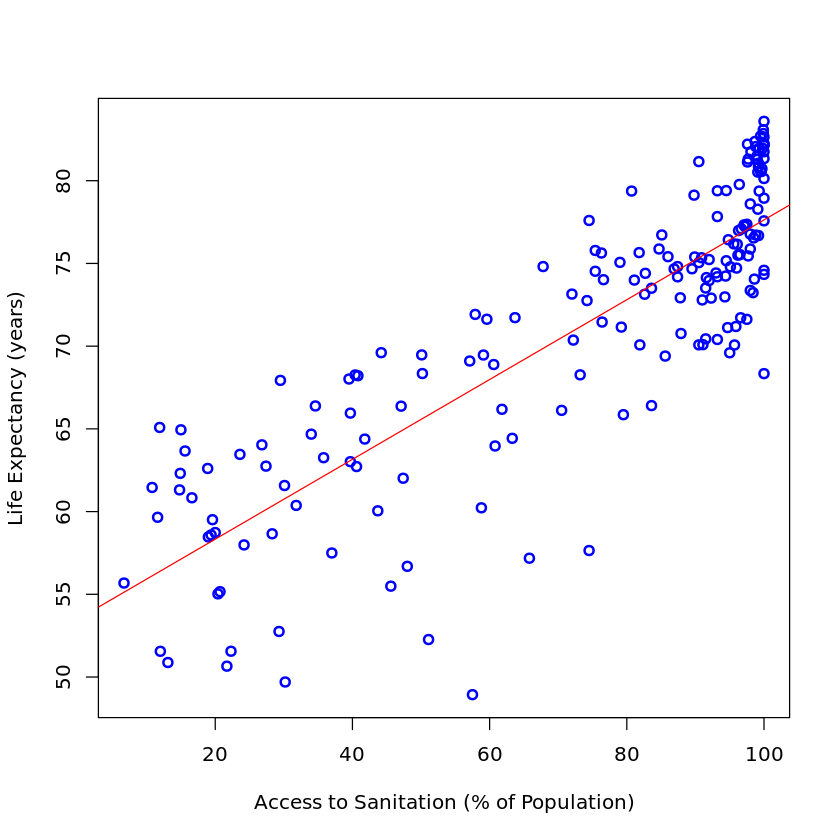

In [8]:
{
# Plot the previous scatter plot
plot(my_data$Access_to_Sanitation, my_data$Life_Expectancy, xlab = "Access to Sanitation (% of Population)",
     ylab = "Life Expectancy (years)", col = "blue", lwd = 2)

# Fit a line in the plot
abline(model, col = "red")
}

-------

<a id="4"></a>
# Using the Model for Estimations/Predictions

Now that we have a model, we can estimate the Life Expectancy for a given value of Access to Sanitation Facilities that isn't in the dataset. For this, we can use the function **`predict()`** and our linear model.

It is interesting to know that `predict` has a way of calculating the confidence in its own prediction. This means that you can get a 95% confidence interval for the predicted point.

In [9]:
# Tips: using point that fall out of the term interval in the training dataset may lead to errors of prediction that are much larger than expected. 
summary(my_data$Access_to_Sanitation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.70   47.70   87.40   72.74   97.35  100.00 

In [10]:
# Create points to predict, use the point that fall between 6.70 and 100.00
pointsToPredict <- data.frame(sanitation = c(10, 42))

#Use predict() to compute our predictions!
predictionWithInterval <- predict(model, pointsToPredict, interval = 'prediction')
predictionWithInterval

,fit,lwr,upr
1,55.92236,46.93336,64.91136
2,63.64124,54.73514,72.54735


#### Let's add our estimations to the previous plot!

In the output above you can see that `fit` is the prediction value, as we have already seen before. The upper and lower bounds for the interval are `lwr` and `upr`.

Let's plot this:

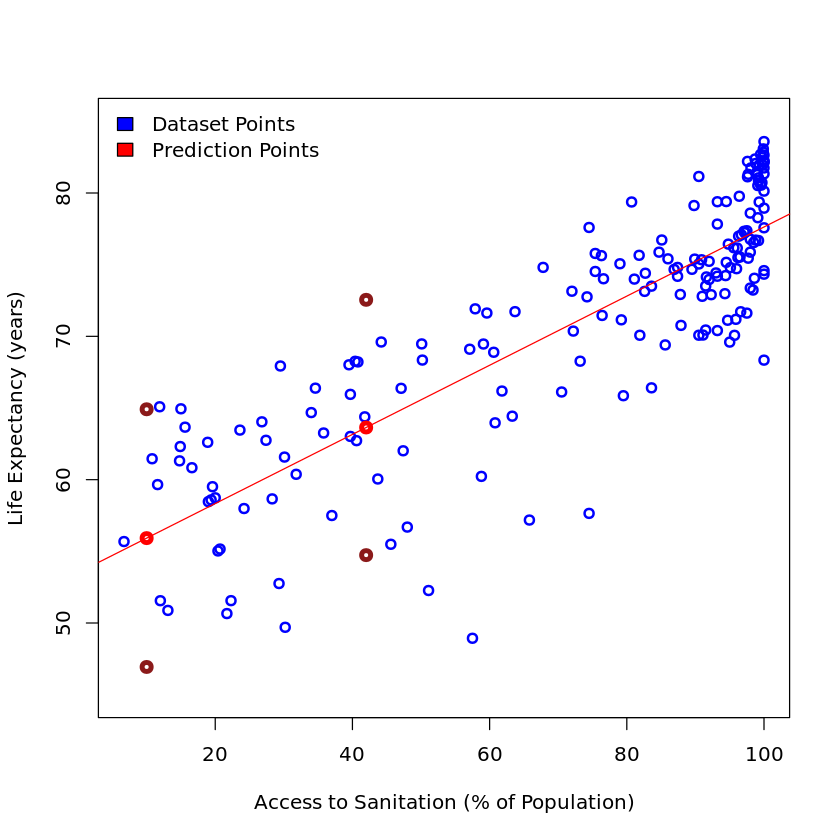

In [11]:
{
# Plot the previous scatter plot
plot(my_data$Access_to_Sanitation, my_data$Life_Expectancy, xlab = "Access to Sanitation (% of Population)",
     ylab = "Life Expectancy (years)", col = "blue", ylim=c(45, 85), lwd = 2)
    
# Add the new predicted points!
points(pointsToPredict$sanitation, predictionWithInterval[,"fit"], col = "red", lwd = 4)
points(pointsToPredict$sanitation, predictionWithInterval[,"lwr"], col = "firebrick4", lwd = 4)
points(pointsToPredict$sanitation, predictionWithInterval[,"upr"], col = "firebrick4", lwd = 4)
    
legend("topleft",legend = c("Dataset Points", "Prediction Points"), fill = c("blue","red"), bty = "n")
    
# Fit a line in the plot
abline(model, col = "red")
}

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://br.linkedin.com/in/victor-barros-2446a390">Victor Barros Costa</a> , <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2017 [IBM Cognitive Class](https://cognitiveclass.ai/?utm_source=ML0151&utm_medium=lab&utm_campaign=cclab). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).